In [4]:
from mss import mss
import pandas as pd
import cv2
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, LSTM
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
import torch

ModuleNotFoundError: No module named 'mss'

In [11]:
import pandas
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import requests
from time import sleep
from tensorflow import keras

df = pandas.DataFrame(columns = ['amount players','round result', 'MO','bank','real x'])
driver = webdriver.Chrome()
driver.get("https://hellstore.me/ru/crash")
f = open('hist.txt','w')
f.close()
counter= 0
sleep(2)
while True:
    counter += 0
    try:
        element1 = WebDriverWait(driver, 600).until(
        EC.presence_of_element_located((By.CLASS_NAME, "game-timer-crashed")))
    except TimeoutException as ex:
        isrunning = 0
        print("Exception has been thrown. " + str(ex))
        driver.close()
    html = driver.page_source
    coeff = driver.find_element(By.CLASS_NAME, "game-timer-crashed")
    coeff = float(coeff.text[0:-1])
    if coeff > 3.0:
        coeff = 3.0
    
    
    real_wins = list()

    def find(driver):
        elem = driver.find_elements(By.CLASS_NAME,"player-winned-amount")
        if elem:
            return elem
        else:
            return False

    element = WebDriverWait(driver, 600).until(find)
    all_wins = driver.find_elements(By.CLASS_NAME,'player-winned-amount')
    for win in all_wins:
        if len(win.text) >= 1:
            real_wins.append(float(win.text[1:]))


    real_betted = list()
    all_betted = driver.find_elements(By.CLASS_NAME,"player-betted-amount")
    for bet in all_betted:
        real_betted.append(float(bet.text[1:]))

    all_loses = list()
    for i in range(len(all_betted)):
        if len(all_wins[i].text) < 1:
            all_loses.append(float(all_betted[i].text[1:]))

    betted_amount = round(sum(real_betted),2)
    round_result = round(betted_amount-sum(real_wins),2)
    f = open("hist.txt","a")

    e1 = driver.find_element(By.CLASS_NAME, "game-timer-crashed")
    amount_of_players = driver.find_element(By.CLASS_NAME, "game-stat-value").text
    f.write(e1.text[0:-1])
    f.write("\n")
    f.close()
    f = open("hist.txt","r").readlines()
    a = []
    for x in f:
        a.append(round(float(x[0:-1]),1))
    thre = 3
    for i in range(len(a)):
        if a[i]>thre:
            a[i] = thre
    d = {}
    for i in a:
        if i in d:
            d[i] +=1
        else:
            d[i] = 1
    #print(d)
    sorted_tuple = sorted(d.items(), key=lambda x: x[0])
    d = dict(sorted_tuple)
    s = 0
    num = 0        
    for i in d.values():
        num +=i
    for i in d.keys():
        tmp = d.get(i)
        s+=(i*tmp/num)
    mo = round(s,3)

    f = open('example.txt','a')
    f.write(f"{amount_of_players};{round_result};{mo};{betted_amount};{coeff}\n")
    f.close()

    if df['real x'].tail(1) is not None and counter > 5:
            df["real x"].replace('replaceme',coeff,inplace=True)
            df_copy = df.copy()
            df_copy['amount players'] = df_copy['amount players'].astype(int)
            df_copy['round result'] = df_copy['round result'].astype(float)
            df_copy['MO'] = df_copy['MO'].astype(float)
            df_copy['bank'] = df_copy['bank'].astype(float)
            df_copy['real x'] = df_copy['real x'].astype(float)

            x = df_copy.iloc[:, :-1].values
            y = df_copy.iloc[:, -1].values
            x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)
            regr = LinearRegression()
            regr.fit(x_train, y_train)

            x = sm.add_constant(x_train)
            model = sm.OLS(y_train,x).fit()
            model.summary()
            y_pred = regr.predict(x_test)
            def mape(actual,pred):
                actual,pred = np.array(actual),np.array(pred)
                return np.mean(np.abs((actual-pred)/actual)) * 100

            y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
            y_test_cat = tf.keras.utils.to_categorical(y_test, 6)
            ann = tf.keras.models.Sequential(layers = None , name = None)
            ann.add(tf.keras.layers.Input(shape = 4,))
            ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
            ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
            ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
            ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
            history = ann.fit(x_train, y_train_cat,  batch_size= 32, epochs = 50 , validation_data = (x_test,y_test_cat))

            #print("mape",mape(y_test,y_pred))
            print(f"{float(regr.predict(df_copy.tail(1).drop(['real x'],axis=1)))}x,{counter}")

    df.loc[len(df.index)] = [f'{amount_of_players}',f'{round_result}',f'{mo}',f'{betted_amount}','replaceme']
    if counter > 5:
        x_new = df_copy.tail(1).drop(['real x'],axis=1)
        y_new = ann.predict(x_new)
        classes_y = np.argmax(y_new,axis=1) 
        print(y_new)



    sleep(10)
    


KeyboardInterrupt: 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(input_dim=6, output_dim=1,
              mask_zero=True,
              trainable=False, embeddings_initializer=tf.keras.initializers.random_normal()),
    SimpleRNN(units=10),
    Dense(2)
])


model.summary()
def loss_fn(model, X, y):
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true=y, 
                                                                          y_pred=model(X), 
                                                                          from_logits=True))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
tr_loss_hist = []

for e in range(30):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in train_ds:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x_mb, y_mb)
            
        grads = tape.gradient(tr_loss, sources=model.variables)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    
    avg_tr_loss /= tr_step
    tr_loss_hist.append(avg_tr_loss)
    
    if (e + 1) % 5 == 0:
        print('epoch: {:3}, tr_loss: {:3f}'.format(e + 1, avg_tr_loss))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import requests
from time import sleep
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels as sm

df_copy1 = pd.read_csv("example.txt",sep=";")



x = df_copy1.iloc[:, :-1].values
y = df_copy1.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)
regr = LinearRegression()
regr.fit(x_train, y_train)

x = add_constant(x_train)
model = OLS(y_train,x).fit()
model.summary()
y_pred = regr.predict(x_test)
def mape(actual,pred):
    actual,pred = np.array(actual),np.array(pred)
    return np.mean(np.abs((actual-pred)/actual)) * 100

y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)
ann = tf.keras.models.Sequential(layers = None , name = None)
ann.add(tf.keras.layers.Input(shape = 4,))
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
history = ann.fit(x_train, y_train_cat,  batch_size= 32, epochs = 50 , validation_data = (x_test,y_test_cat))

res = pd.read_csv('example.txt',sep=';')
res['amount_of_players'] = res['amount_of_players'].astype(int)
res['round_result'] = res['round_result'].astype(float)
res['MO'] = res['MO'].astype(float)
res['bank'] = res['bank'].astype(float)
res['real_x'] = res['real_x'].astype(float)
res1 = res.drop(['real_x'],axis=1).tail(1).values
ress = ann.predict(res1)
#print("mape",mape(y_test,y_pred))
print(ress)

ValueError: Cannot convert '4' to a shape.

In [10]:
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import requests
from time import sleep
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels as sm

In [11]:
import numpy as np
import pandas as pd
res = pd.read_csv('example.txt',sep=';')
res['amount_of_players'] = res['amount_of_players'].astype(int)
res['round_result'] = res['round_result'].astype(float)
res['MO'] = res['MO'].astype(float)
res['bank'] = res['bank'].astype(float)
res['real_x'] = res['real_x'].astype(float)
res1 = res.drop(['real_x'],axis=1).tail(1).values
ress = ann.predict(res1)
ress

NameError: name 'ann' is not defined

In [ ]:
df_copy = df.copy()
df_copy = df_copy.drop(int(x) for x in range(347,379))
df_copy['amount players'] = df_copy['amount players'].astype(int)
df_copy['round result'] = df_copy['round result'].astype(float)
df_copy['MO'] = df_copy['MO'].astype(float)
df_copy['bank'] = df_copy['bank'].astype(float)
df_copy['real x'] = df_copy['real x'].astype(float)

x = df_copy.iloc[:, :-1].values
y = df_copy.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)
regr = LinearRegression()
regr.fit(x_train, y_train)

x = sm.add_constant(x_train)
model = sm.OLS(y_train,x).fit()
model.summary()
y_pred = regr.predict(x_test)
print(mean_squared_error(y_test,y_pred))
def mape(actual,pred):
    actual,pred = np.array(actual),np.array(pred)
    return np.mean(np.abs((actual-pred)/actual)) * 100

mape(y_test,y_pred)

41862.999400508284


228.0215328404791

In [ ]:
df1_copy = df.copy()


,amount players,round result,MO,bank,real x
0,18,233.15,1.1,233.15,1.02
1,21,129.3,1.05,130.23,1.23
2,18,34.01,1.1,42.79,3.8
3,23,-11.83,1.775,85.6,1.87
4,22,-24.29,1.8,115.39,6.48
...,...,...,...,...,...
374,16,41.74,2.56,52.5,1.54
375,16,41.74,2.557,52.5,1.54
376,16,41.74,2.554,52.5,1.54
377,16,41.74,2.551,52.5,1.54


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
x = sm.add_constant(x_train)
model = sm.OLS(y_train,x).fit()
model.summary()
y_pred = regr.predict(x_test)
print(mean_squared_error(y_test,y_pred))

41862.999400508284


In [ ]:
def mape(actual,pred):
    actual,pred = np.array(actual),np.array(pred)
    return np.mean(np.abs((actual-pred)/actual)) * 100

mape(y_test,y_pred)

228.0215328404791

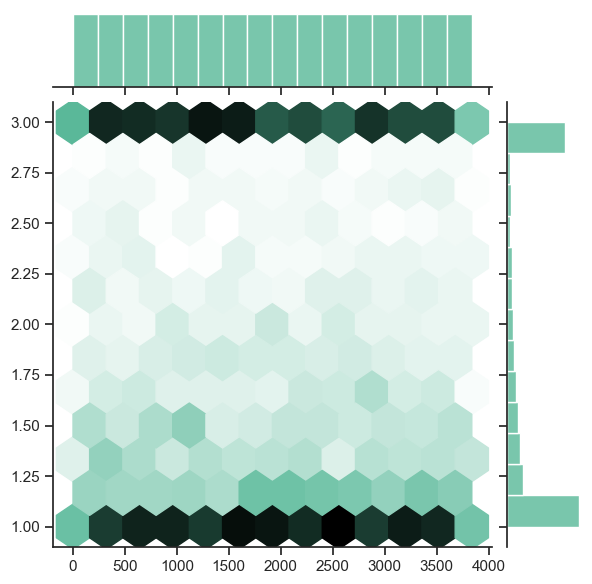

In [ ]:
import pandas as pd
import seaborn as sns

df_plot = pd.read_csv('example.txt',sep=';')
df_plot = pd.DataFrame(df_plot['coeff'])


sns.set_theme(style="ticks")

x = [int(x) for x in range(1,3839)]
y = df_plot['coeff'].values

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

In [8]:
df_plot.describe()

NameError: name 'df_plot' is not defined

Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff'],
      dtype='object')
Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0089 - val_loss: 6.3458e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - val_loss: 5.2306e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6540e-04 - val_loss: 5.5741e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 5.1035e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 5.1020e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.6230e-04 - val_loss: 5.2711e-04
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1195e-04 - val_loss: 5.4480e-04
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.8009e-04 - val_loss: 5.7054e-04
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6882e-04 - val_loss: 5.0628e-04
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7519e-04 - val_loss: 5.2109e-04
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 5.0842

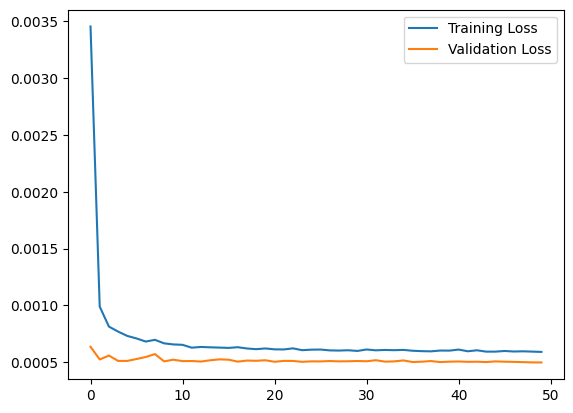

Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0040 - val_loss: 5.1545e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - val_loss: 5.2924e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.9200e-04 - val_loss: 5.4111e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.0358e-04 - val_loss: 5.0964e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6579e-04 - val_loss: 5.0480e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7971e-04 - val_loss: 5.0875e-04
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.1531e-04 - val_loss: 5.2241e-04
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1254e-04 - val_loss: 5.2948e-04
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2975e-04 - val_loss: 5.3257e-04
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010 - val_loss: 5.0077e-04
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1191e-04 - val_loss

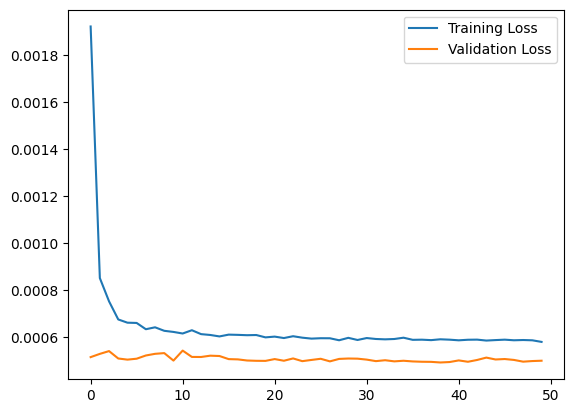

Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0052 - val_loss: 5.3132e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.0859e-04 - val_loss: 5.7889e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 5.7736e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1880e-04 - val_loss: 5.0087e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.9549e-04 - val_loss: 5.0413e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.5131e-04 - val_loss: 5.0615e-04
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6589e-04 - val_loss: 5.1679e-04
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 5.0789e-04
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.3341e-04 - val_loss: 5.3702e-04
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 5.1050e-04
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7675e-04 - val_loss: 5.

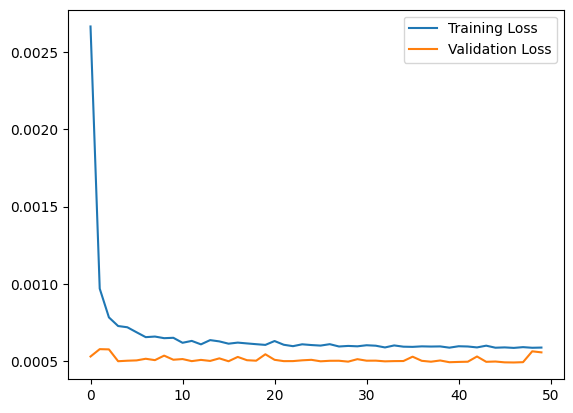

Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0026 - val_loss: 5.6659e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.0162e-04 - val_loss: 5.1794e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.0200e-04 - val_loss: 5.1038e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.3696e-04 - val_loss: 5.1129e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1679e-04 - val_loss: 5.0814e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - val_loss: 5.1959e-04
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7943e-04 - val_loss: 5.0671e-04
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 5.0444e-04
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6884e-04 - val_loss: 5.0958e-04
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3743e-04 - val_loss: 5.4144e-04
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0015 - val_loss: 5.

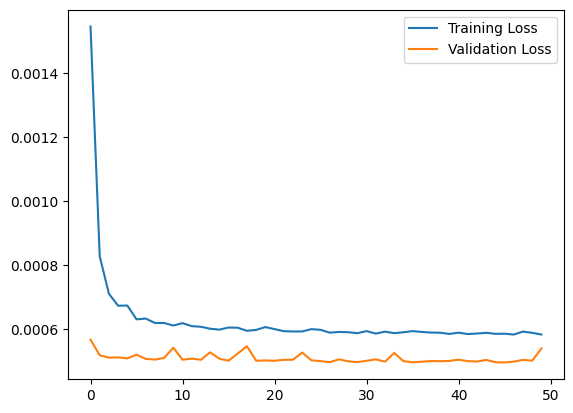

Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0036 - val_loss: 5.5860e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.5086e-04 - val_loss: 5.2005e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.7933e-04 - val_loss: 5.1981e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6577e-04 - val_loss: 5.5911e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3589e-04 - val_loss: 5.5107e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3999e-04 - val_loss: 5.4957e-04
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.9518e-04 - val_loss: 5.0742e-04
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7363e-04 - val_loss: 5.1905e-04
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6166e-04 - val_loss: 5.0451e-04
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8701e-04 - val_loss: 5.0937e-04
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5389e-04 - 

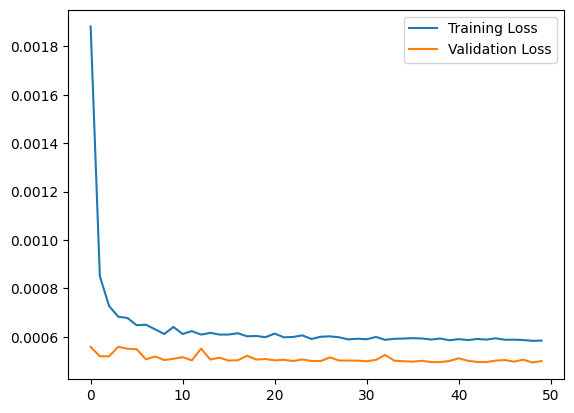

Index(['amount players', 'round result', 'MO', 'bank', 'timee', 'wkday',
       'coeff', 'hour', 'day_of_week', 'day_of_month', 'month', 'year'],
      dtype='object')
Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0028 - val_loss: 5.1703e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5805e-04 - val_loss: 5.2972e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3798e-04 - val_loss: 5.5333e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.5676e-04 - val_loss: 5.0511e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0644e-04 - val_loss: 5.3165e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 5.0437e-04
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.5056e-04 - val_loss: 5.1570e-04
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.6545e-04 - val_loss: 5.2031e-04
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3727e-04 - val_loss: 5.0200e-04
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1096e-04 - val_loss: 5.1151e-04
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - val_loss

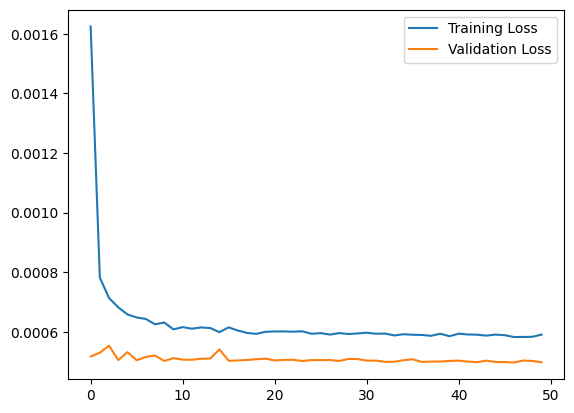

KeyboardInterrupt: 

In [74]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
import statsmodels as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn as sk
import os
from collections import Counter
from datetime import date
import datetime
import calendar
import time
import string
from string import digits
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input, Embedding, TimeDistributed, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


def mape(actual,pred):
    actual,pred = np.array(actual),np.array(pred)
    return np.mean(np.abs((actual-pred)/actual)) * 100


counter = 0
df = pd.read_csv(r"F:\folders\casino\histtt.txt",sep =";")
driver = webdriver.Chrome()
driver.get("https://hellstore.me/ru/crash")
sleep(2)
while True:
    counter +=1

    try:
        element = WebDriverWait(driver,600).until(
            EC.presence_of_element_located((By.CLASS_NAME, "game-timer-crashed"))
        )
    except TimeoutException as ex:
        print("Exceptinon has been thrown" + str(ex))
    html = driver.page_source


    #amount players pd ------------------------------------------------------------------------------------
    amount_of_players = float(driver.find_element(By.CLASS_NAME,"game-stat-value").text)


    #round result pd --------------------------------------------------------------------------------------
    betted_amount = list()
    all_betted = driver.find_elements(By.CLASS_NAME,"player-betted-amount")
    for bet in all_betted:
        betted_amount.append(float(bet.text[1:]))
    

    real_wins = list()
    all_wins = driver.find_elements(By.CLASS_NAME, 'player-winned-amount')
    for win in all_wins:
        if win.text != '':
            real_wins.append(float(win.text[1:]))


    round_result = round(sum(betted_amount) - sum(real_wins),2)


    #MO pd -------------------------------------------------------------------------------------------------
    f = open(r"F:\folders\casino\mo.txt","r").readlines()
    a = []
    for x in f:
        a.append(round(float(x[0:-1]),1))
    thre = 3
    for i in range(len(a)):
        if a[i]>thre:
            a[i] = thre
    d = {}
    for i in a:
        if i in d:
            d[i] +=1
        else:
            d[i] = 1
    sorted_tuple = sorted(d.items(), key=lambda x: x[0])
    d = dict(sorted_tuple)
    s = 0
    num = 0        
    for i in d.values():
        num +=i
    for i in d.keys():
        tmp = d.get(i)
        s+=(i*tmp/num)
    mo = round(s,3)
    #bank pd ----------------------------------------------------------------------------------------------
    bank = round(sum(betted_amount),2)


    #timee pd ----------------------------------------------------------------------------------------------
    timee = round(time.time(),2)


    #weekday pd ----------------------------------------------------------------------------------------------
    wkday = (datetime.datetime.today().weekday())+1


    #coeff pd ----------------------------------------------------------------------------------------------
    f = open("hist.txt","a")
    e1 = driver.find_element(By.CLASS_NAME, "game-timer-crashed")
    f.write(e1.text[0:-1])
    f.write("\n")
    f.close()
    coeff = driver.find_element(By.CLASS_NAME, "game-timer-crashed")
    coeff = float(coeff.text[0:-1])
    ff = open(r"F:\folders\casino\mo.txt","a")
    ff.write(f'{coeff}')
    ff.write('\n')
    ff.close()
    df.dropna(inplace=True)

    print(df.columns)

    file = open(r'F:\folders\casino\histtt.txt','a')
    file.write(f'{amount_of_players};{round_result};{mo};{bank};{timee};{wkday};{coeff}')
    file.write('\n')
    file.close()

    df['amount players'] = df['amount players'].astype(float)
    df['round result'] = df['round result'].astype(float)
    df['MO'] = df['MO'].astype(float)
    df['bank'] = df['bank'].astype(float)

    df['timee'] = pd.to_datetime(df['timee'], unit='s')
    df['hour'] = df['timee'].dt.hour
    df['day_of_week'] = df['timee'].dt.dayofweek
    df['day_of_month'] = df['timee'].dt.day
    df['month'] = df['timee'].dt.month
    df['year'] = df['timee'].dt.year


    df['wkday'] = df['wkday'].astype(int)
    df['coeff'] = df['coeff'].astype(float)


    X = df[['amount players', 'round result', 'MO', 'bank', 'hour', 'day_of_week', 'day_of_month', 'month', 'year', 'wkday']].values
    y = df['coeff'].values


    #NEURAL NETWORK
    if counter > 5:
        
        X = df[['amount players', 'round result', 'MO', 'bank', 'hour', 'day_of_week', 'day_of_month', 'month', 'year', 'wkday']].values
        y = df['coeff'].values

        scaler_X = MinMaxScaler()
        X_scaled = scaler_X.fit_transform(X)

        scaler_y = MinMaxScaler()
        y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
        def create_windows(data, target, window_size):
            Xs, ys = [], []
            for i in range(len(data) - window_size):
                Xs.append(data[i:i + window_size])
                ys.append(target[i + window_size])
            return np.array(Xs), np.array(ys)

        window_size = 10
        X_windows, y_windows = create_windows(X_scaled, y_scaled, window_size)

        X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

        model = Sequential()
        model.add(LSTM(64, input_shape=(window_size, X_train.shape[2]), return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(32))
        model.add(Dropout(0.2))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mean_squared_error')

        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

        loss = model.evaluate(X_test, y_test)
        print(f'Test Loss: {loss}')
        y_pred_scaled = model.predict(X_test)
        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        y_test_original = scaler_y.inverse_transform(y_test)
        for i in range(10):
            print(f'Original: {y_test_original[i]}, Predicted: {y_pred[i]}')

        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.legend()
        plt.show()
                    

    sleep(10)

In [42]:
df

,amount players,round result,MO,bank,timee,wkday,coeff,hour,day_of_week,day_of_month,month,year
0,23.0,-20.71,0.000,50.35,2024-05-20 12:44:06.069999933,1,3.00,12,0,20,5,2024
1,18.0,52.97,3.000,117.89,2024-05-20 12:45:05.640000105,1,1.11,12,0,20,5,2024
2,18.0,52.02,2.050,129.88,2024-05-20 12:47:08.180000067,1,1.56,12,0,20,5,2024
3,22.0,-35.86,1.900,71.50,2024-05-20 12:47:41.920000076,1,3.00,12,0,20,5,2024
4,18.0,176.21,2.175,176.21,2024-05-20 12:47:56.769999981,1,1.02,12,0,20,5,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
632,21.0,28.43,1.914,98.43,2024-05-20 21:30:39.170000076,2,1.58,21,0,20,5,2024
633,20.0,-27.96,1.913,317.83,2024-05-20 21:31:21.539999962,2,11.42,21,0,20,5,2024
634,17.0,41.22,1.915,53.68,2024-05-20 21:31:40.529999970,2,1.23,21,0,20,5,2024
635,18.0,-10.41,1.914,53.97,2024-05-20 21:32:25.349999905,2,4.07,21,0,20,5,2024


In [2]:
sumdf = pd.read_csv(r'F:\folders\casino\histtt.txt',sep = ";")
lendf = len(sumdf['round result'])
res = sumdf['round result']
sum(res)

NameError: name 'pd' is not defined

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from time import sleep
import datetime
import time
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from random import randint


def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

counter = 0
df = pd.read_csv(r"F:\folders\casino\histtt.txt", sep=";")
driver = webdriver.Chrome()
driver.get("https://hellstore.me/ru/crash")
sleep(2)

while True:
    counter += 1

    try:
        element = WebDriverWait(driver, 600).until(
            EC.presence_of_element_located((By.CLASS_NAME, "game-timer-crashed"))
        )
    except TimeoutException as ex:
        print("Exception has been thrown" + str(ex))
    html = driver.page_source

    amount_of_players = float(driver.find_element(By.CLASS_NAME, "game-stat-value").text)

    betted_amount = list()
    all_betted = driver.find_elements(By.CLASS_NAME, "player-betted-amount")
    for bet in all_betted:
        betted_amount.append(float(bet.text[1:]))

    real_wins = list()
    all_wins = driver.find_elements(By.CLASS_NAME, 'player-winned-amount')
    for win in all_wins:
        if win.text != '':
            real_wins.append(float(win.text[1:]))

    round_result = round(sum(betted_amount) - sum(real_wins), 2)

    f = open(r"F:\folders\casino\mo.txt", "r").readlines()
    a = []
    for x in f:
        a.append(round(float(x[0:-1]), 1))
    thre = 3
    for i in range(len(a)):
        if a[i] > thre:
            a[i] = thre
    d = {}
    for i in a:
        if i in d:
            d[i] += 1
        else:
            d[i] = 1
    sorted_tuple = sorted(d.items(), key=lambda x: x[0])
    d = dict(sorted_tuple)
    s = 0
    num = 0        
    for i in d.values():
        num += i
    for i in d.keys():
        tmp = d.get(i)
        s += (i * tmp / num)
    mo = round(s, 3)
    bank = round(sum(betted_amount), 2)
    timee = round(time.time(), 2)
    wkday = (datetime.datetime.today().weekday()) + 1
    f = open("hist.txt", "a")
    e1 = driver.find_element(By.CLASS_NAME, "game-timer-crashed")
    f.write(e1.text[0:-1])
    f.write("\n")
    f.close()
    coeff = driver.find_element(By.CLASS_NAME, "game-timer-crashed")
    coeff = float(coeff.text[0:-1])
    ff = open(r"F:\folders\casino\mo.txt", "a")
    ff.write(f'{coeff}')
    ff.write('\n')
    ff.close()
    df.dropna(inplace=True)

    file = open(r'F:\folders\casino\histtt.txt', 'a')
    file.write(f'{amount_of_players};{round_result};{mo};{bank};{timee};{wkday};{coeff}')
    file.write('\n')
    file.close()

    df['amount players'] = df['amount players'].astype(float)
    df['round result'] = df['round result'].astype(float)
    df['MO'] = df['MO'].astype(float)
    df['bank'] = df['bank'].astype(float)
    df['timee'] = pd.to_datetime(df['timee'], unit='s')
    df['hour'] = df['timee'].dt.hour
    df['day_of_week'] = df['timee'].dt.dayofweek
    df['day_of_month'] = df['timee'].dt.day
    df['month'] = df['timee'].dt.month
    df['year'] = df['timee'].dt.year
    df['wkday'] = df['wkday'].astype(int)
    df['coeff'] = df['coeff'].astype(float)

    df['target'] = (df['coeff'] > 1.2).astype(int)

    X = df[['amount players', 'round result', 'MO', 'bank','hour', 'day_of_week', 'day_of_month', 'month', 'year', 'wkday']].values
    y = df['target'].values

    if counter > 5:
        scaler_X = MinMaxScaler()
        X_scaled = scaler_X.fit_transform(X)

        def create_windows(data, target, window_size):
            Xs, ys = [], []
            for i in range(len(data) - window_size):
                Xs.append(data[i:i + window_size])
                ys.append(target[i + window_size])
            return np.array(Xs), np.array(ys)

        window_size = 11
        X_windows, y_windows = create_windows(X_scaled, y, window_size)
        X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

        model = Sequential()
        model.add(LSTM(64, input_shape=(window_size, X_train.shape[2]), return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(32))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

        loss, accuracy = model.evaluate(X_test, y_test)

        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
        print(f'Accuracy: {accuracy}',end=' ')
        print(f'Loss: {loss}',end=' ')
        print(f'MAPE: {mape(y_test, y_pred_prob)}',end=' ')
        print(y_pred, y_test)

    sleep(10)


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6441 - loss: 0.6525 - val_accuracy: 0.6392 - val_loss: 0.6547
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6379 - loss: 0.6553 - val_accuracy: 0.6392 - val_loss: 0.6556
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6394 - loss: 0.6565 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6394 - loss: 0.6555 - val_accuracy: 0.6392 - val_loss: 0.6530
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6450 - loss: 0.6507 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6437 - loss: 0.6525 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6411 - loss: 0.6519 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6465 - loss: 0.6497 - val_accuracy: 0

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6382 - loss: 0.6579 - val_accuracy: 0.6392 - val_loss: 0.6530
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6454 - loss: 0.6522 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6445 - loss: 0.6531 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6353 - loss: 0.6574 - val_accuracy: 0.6392 - val_loss: 0.6530
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6511 - loss: 0.6489 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6311 - loss: 0.6599 - val_accuracy: 0.6392 - val_loss: 0.6525
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6448 - loss: 0.6510 - val_accuracy: 0.6392 - val_loss: 0.6525
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6311 - loss: 0.6603 - val_accuracy: 0.6421 - v

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6236 - loss: 0.6632 - val_accuracy: 0.6392 - val_loss: 0.6539
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6305 - loss: 0.6607 - val_accuracy: 0.6392 - val_loss: 0.6536
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6374 - loss: 0.6574 - val_accuracy: 0.6392 - val_loss: 0.6540
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6286 - loss: 0.6627 - val_accuracy: 0.6392 - val_loss: 0.6542
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6451 - loss: 0.6516 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6332 - loss: 0.6568 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6394 - loss: 0.6550 - val_accuracy: 0.6392 - val_loss: 0.6536
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6483 - loss: 0.6496 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6120 - loss: 0.6662 - val_accuracy: 0.6392 - val_loss: 0.6566
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6371 - loss: 0.6590 - val_accuracy: 0.6392 - val_loss: 0.6544
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6500 - loss: 0.6507 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6365 - loss: 0.6561 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6341 - loss: 0.6579 - val_accuracy: 0.6392 - val_loss: 0.6563
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6303 - loss: 0.6619 - val_accuracy: 0.6392 - val_loss: 0.6530
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6359 - loss: 0.6554 - val_accuracy: 0.6392 - val_loss: 0.6551
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6474 - loss: 0.6498 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6396 - loss: 0.6575 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6310 - loss: 0.6598 - val_accuracy: 0.6392 - val_loss: 0.6594
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6241 - loss: 0.6664 - val_accuracy: 0.6392 - val_loss: 0.6583
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6297 - loss: 0.6646 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6388 - loss: 0.6542 - val_accuracy: 0.6392 - val_loss: 0.6536
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6316 - loss: 0.6599 - val_accuracy: 0.6392 - val_loss: 0.6533
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6250 - loss: 0.6623 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6422 - loss: 0.6524 - val_accuracy: 0.6392 - v

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6484 - loss: 0.6552 - val_accuracy: 0.6392 - val_loss: 0.6556
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6352 - loss: 0.6579 - val_accuracy: 0.6392 - val_loss: 0.6541
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6292 - loss: 0.6589 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6344 - loss: 0.6581 - val_accuracy: 0.6392 - val_loss: 0.6535
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6266 - loss: 0.6622 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6366 - loss: 0.6550 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6383 - loss: 0.6548 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6320 - loss: 0.6584 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6248 - loss: 0.6644 - val_accuracy: 0.6392 - val_loss: 0.6537
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6377 - loss: 0.6583 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6465 - loss: 0.6507 - val_accuracy: 0.6392 - val_loss: 0.6548
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6330 - loss: 0.6618 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6326 - loss: 0.6584 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6351 - loss: 0.6571 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6407 - loss: 0.6531 - val_accuracy: 0.6392 - val_loss: 0.6525
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6255 - loss: 0.6624 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6096 - loss: 0.6680 - val_accuracy: 0.6392 - val_loss: 0.6587
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6345 - loss: 0.6628 - val_accuracy: 0.6392 - val_loss: 0.6542
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6409 - loss: 0.6523 - val_accuracy: 0.6392 - val_loss: 0.6536
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6433 - loss: 0.6535 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6344 - loss: 0.6581 - val_accuracy: 0.6392 - val_loss: 0.6544
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6367 - loss: 0.6575 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6333 - loss: 0.6587 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6441 - loss: 0.6523 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6288 - loss: 0.6599 - val_accuracy: 0.6392 - val_loss: 0.6560
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6308 - loss: 0.6598 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6290 - loss: 0.6620 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6537 - loss: 0.6472 - val_accuracy: 0.6392 - val_loss: 0.6530
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6330 - loss: 0.6579 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6397 - loss: 0.6549 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6259 - loss: 0.6634 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6353 - loss: 0.6574 - val_accuracy: 0.6421 - val_

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6363 - loss: 0.6586 - val_accuracy: 0.6392 - val_loss: 0.6541
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6394 - loss: 0.6548 - val_accuracy: 0.6392 - val_loss: 0.6539
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6452 - loss: 0.6512 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6352 - loss: 0.6583 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6466 - loss: 0.6516 - val_accuracy: 0.6392 - val_loss: 0.6538
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6280 - loss: 0.6614 - val_accuracy: 0.6392 - val_loss: 0.6538
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6368 - loss: 0.6562 - val_accuracy: 0.6392 - val_loss: 0.6536
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6389 - loss: 0.6546 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6455 - loss: 0.6574 - val_accuracy: 0.6392 - val_loss: 0.6557
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6438 - loss: 0.6543 - val_accuracy: 0.6392 - val_loss: 0.6537
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6407 - loss: 0.6543 - val_accuracy: 0.6392 - val_loss: 0.6597
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6475 - loss: 0.6531 - val_accuracy: 0.6392 - val_loss: 0.6573
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6475 - loss: 0.6518 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6478 - loss: 0.6501 - val_accuracy: 0.6392 - val_loss: 0.6533
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6422 - loss: 0.6533 - val_accuracy: 0.6392 - val_loss: 0.6542
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6330 - loss: 0.6597 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6434 - loss: 0.6590 - val_accuracy: 0.6392 - val_loss: 0.6536
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6504 - loss: 0.6495 - val_accuracy: 0.6392 - val_loss: 0.6535
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6356 - loss: 0.6572 - val_accuracy: 0.6392 - val_loss: 0.6536
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6407 - loss: 0.6546 - val_accuracy: 0.6392 - val_loss: 0.6531
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6348 - loss: 0.6570 - val_accuracy: 0.6392 - val_loss: 0.6544
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6453 - loss: 0.6502 - val_accuracy: 0.6392 - val_loss: 0.6537
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6437 - loss: 0.6523 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6333 - loss: 0.6570 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6411 - loss: 0.6577 - val_accuracy: 0.6392 - val_loss: 0.6542
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6495 - loss: 0.6496 - val_accuracy: 0.6392 - val_loss: 0.6535
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6396 - loss: 0.6547 - val_accuracy: 0.6392 - val_loss: 0.6533
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6503 - loss: 0.6496 - val_accuracy: 0.6392 - val_loss: 0.6538
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6316 - loss: 0.6588 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6313 - loss: 0.6595 - val_accuracy: 0.6392 - val_loss: 0.6527
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6479 - loss: 0.6492 - val_accuracy: 0.6392 - val_loss: 0.6524
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6486 - loss: 0.6493 - val_accuracy: 0.6392 - val_

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6219 - loss: 0.6613 - val_accuracy: 0.6392 - val_loss: 0.6541
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6409 - loss: 0.6552 - val_accuracy: 0.6392 - val_loss: 0.6568
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6344 - loss: 0.6581 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6382 - loss: 0.6570 - val_accuracy: 0.6392 - val_loss: 0.6581
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6244 - loss: 0.6615 - val_accuracy: 0.6392 - val_loss: 0.6531
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6440 - loss: 0.6537 - val_accuracy: 0.6392 - val_loss: 0.6530
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6385 - loss: 0.6552 - val_accuracy: 0.6392 - val_loss: 0.6533
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6350 - loss: 0.6579 - val_accuracy: 0.6392 - val_

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6160 - loss: 0.6659 - val_accuracy: 0.6392 - val_loss: 0.6547
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6321 - loss: 0.6604 - val_accuracy: 0.6392 - val_loss: 0.6527
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6347 - loss: 0.6592 - val_accuracy: 0.6392 - val_loss: 0.6543
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6315 - loss: 0.6594 - val_accuracy: 0.6392 - val_loss: 0.6536
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6399 - loss: 0.6553 - val_accuracy: 0.6392 - val_loss: 0.6533
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6382 - loss: 0.6545 - val_accuracy: 0.6392 - val_loss: 0.6524
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6407 - loss: 0.6532 - val_accuracy: 0.6431 - val_loss: 0.6513
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6346 - loss: 0.6582 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6507 - loss: 0.6526 - val_accuracy: 0.6392 - val_loss: 0.6555
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6333 - loss: 0.6588 - val_accuracy: 0.6392 - val_loss: 0.6558
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6330 - loss: 0.6597 - val_accuracy: 0.6392 - val_loss: 0.6549
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6193 - loss: 0.6675 - val_accuracy: 0.6392 - val_loss: 0.6536
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6442 - loss: 0.6533 - val_accuracy: 0.6392 - val_loss: 0.6530
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6468 - loss: 0.6506 - val_accuracy: 0.6392 - val_loss: 0.6542
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6412 - loss: 0.6521 - val_accuracy: 0.6392 - val_loss: 0.6543
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6475 - loss: 0.6501 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6468 - loss: 0.6563 - val_accuracy: 0.6392 - val_loss: 0.6542
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6389 - loss: 0.6564 - val_accuracy: 0.6392 - val_loss: 0.6539
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6436 - loss: 0.6541 - val_accuracy: 0.6392 - val_loss: 0.6534
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6444 - loss: 0.6538 - val_accuracy: 0.6392 - val_loss: 0.6542
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6294 - loss: 0.6616 - val_accuracy: 0.6392 - val_loss: 0.6537
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6308 - loss: 0.6587 - val_accuracy: 0.6392 - val_loss: 0.6543
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6377 - loss: 0.6567 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6409 - loss: 0.6531 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6051 - loss: 0.6686 - val_accuracy: 0.6392 - val_loss: 0.6540
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6295 - loss: 0.6614 - val_accuracy: 0.6392 - val_loss: 0.6543
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6483 - loss: 0.6491 - val_accuracy: 0.6392 - val_loss: 0.6538
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6450 - loss: 0.6523 - val_accuracy: 0.6392 - val_loss: 0.6535
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6384 - loss: 0.6563 - val_accuracy: 0.6392 - val_loss: 0.6531
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6407 - loss: 0.6530 - val_accuracy: 0.6392 - val_loss: 0.6533
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6385 - loss: 0.6558 - val_accuracy: 0.6392 - val_loss: 0.6531
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6445 - loss: 0.6509 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6267 - loss: 0.6663 - val_accuracy: 0.6392 - val_loss: 0.6548
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6347 - loss: 0.6590 - val_accuracy: 0.6392 - val_loss: 0.6539
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6367 - loss: 0.6565 - val_accuracy: 0.6392 - val_loss: 0.6533
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6442 - loss: 0.6512 - val_accuracy: 0.6392 - val_loss: 0.6569
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6407 - loss: 0.6556 - val_accuracy: 0.6392 - val_loss: 0.6537
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6395 - loss: 0.6552 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6339 - loss: 0.6584 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6416 - loss: 0.6528 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


Epoch 1/50


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6428 - loss: 0.6524 - val_accuracy: 0.6392 - val_loss: 0.6557
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6326 - loss: 0.6596 - val_accuracy: 0.6392 - val_loss: 0.6532
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6434 - loss: 0.6540 - val_accuracy: 0.6392 - val_loss: 0.6531
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6464 - loss: 0.6509 - val_accuracy: 0.6392 - val_loss: 0.6529
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6399 - loss: 0.6541 - val_accuracy: 0.6392 - val_loss: 0.6528
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6360 - loss: 0.6574 - val_accuracy: 0.6392 - val_loss: 0.6533
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6334 - loss: 0.6573 - val_accuracy: 0.6392 - val_loss: 0.6525
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6265 - loss: 0.6630 - val_accuracy: 0.6392 - val

C:\Users\test\AppData\Local\Temp\ipykernel_17032\2383951915.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


StaleElementReferenceException: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=125.0.6422.141); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF700BB1F52+60322]
	(No symbol) [0x00007FF700B2CEC9]
	(No symbol) [0x00007FF7009E7EBA]
	(No symbol) [0x00007FF7009EDCEE]
	(No symbol) [0x00007FF7009F0641]
	(No symbol) [0x00007FF7009F06E0]
	(No symbol) [0x00007FF700A314FB]
	(No symbol) [0x00007FF700A5C21A]
	(No symbol) [0x00007FF700A2ADB6]
	(No symbol) [0x00007FF700A5C430]
	(No symbol) [0x00007FF700A7BC80]
	(No symbol) [0x00007FF700A5BFC3]
	(No symbol) [0x00007FF700A29617]
	(No symbol) [0x00007FF700A2A211]
	GetHandleVerifier [0x00007FF700EC94AD+3301629]
	GetHandleVerifier [0x00007FF700F136D3+3605283]
	GetHandleVerifier [0x00007FF700F09450+3563680]
	GetHandleVerifier [0x00007FF700C64326+790390]
	(No symbol) [0x00007FF700B3750F]
	(No symbol) [0x00007FF700B33404]
	(No symbol) [0x00007FF700B33592]
	(No symbol) [0x00007FF700B22F9F]
	BaseThreadInitThunk [0x00007FFDEBBB257D+29]
	RtlUserThreadStart [0x00007FFDECC0AA48+40]
